# Regularization

In [69]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Make data smaller
train_images = train_images[:300] 
train_labels = train_labels[:300]
test_images = test_images[:300] 
test_labels = test_labels[:300]


# Preprocess data
train_images = train_images.reshape((300, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((300, 28 * 28)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define the model
model = models.Sequential()
model.add(layers.Dense(2048, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(2048, activation='relu'))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=100, batch_size=32, validation_split=0.3, verbose=False)


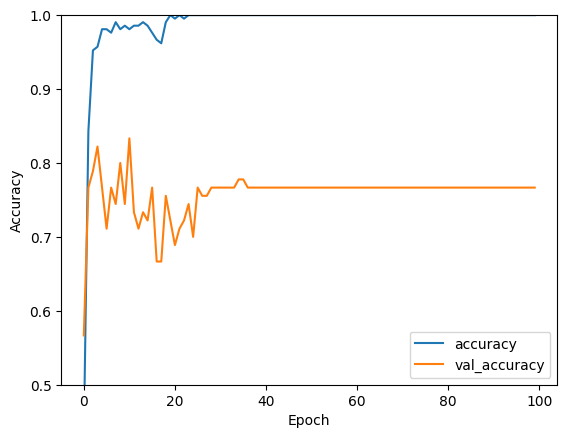

In [70]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')


In [77]:
from tensorflow.keras import regularizers


regularized_model = models.Sequential()

regularized_model.add(layers.Dense(2048, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(28 * 28,)))
regularized_model.add(layers.Dropout(0.5))
regularized_model.add(layers.BatchNormalization())

regularized_model.add(layers.Dense(2048, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
regularized_model.add(layers.Dropout(0.5)) 
regularized_model.add(layers.BatchNormalization()) 

regularized_model.add(layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l1_l2(0.001)))
regularized_model.add(layers.Dropout(0.5))
regularized_model.add(layers.BatchNormalization()) 

regularized_model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1(0.01)))
regularized_model.add(layers.Dropout(0.5))
regularized_model.add(layers.BatchNormalization())

regularized_model.add(layers.Dense(10, activation='softmax'))

regularized_model.compile(optimizer='adam',
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])


In [78]:
reg_history = regularized_model.fit(train_images, train_labels, epochs=100, batch_size=32, validation_split=0.3, verbose=False)

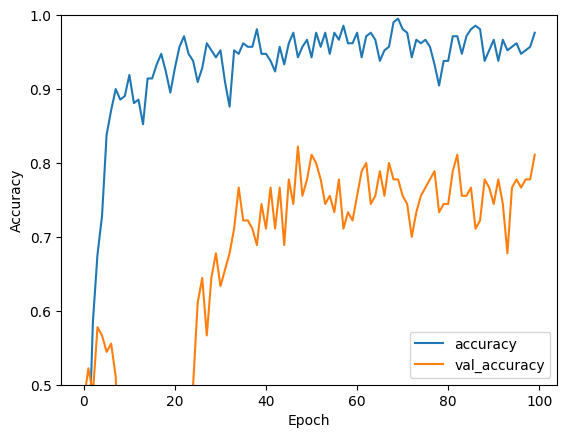

In [79]:
plt.plot(reg_history.history['accuracy'], label='accuracy')
plt.plot(reg_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')